In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_credit = pd.read_csv("Data file.csv")
df_credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df_credit.shape

(209593, 37)

# EDA

In [4]:
df_credit.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

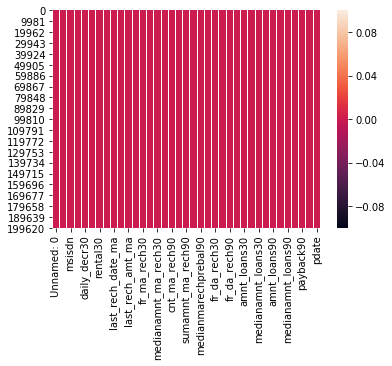

In [5]:
sns.heatmap(df_credit.isnull())

In [6]:
del df_credit['Unnamed: 0']

In [7]:
df_credit

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [8]:
df_credit.shape

(209593, 36)

In [9]:
df_credit.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [10]:
df_credit.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
del df_credit['pcircle']

In [12]:
df_credit

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [13]:
df_credit.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [14]:
del df_credit['msisdn']

In [15]:
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


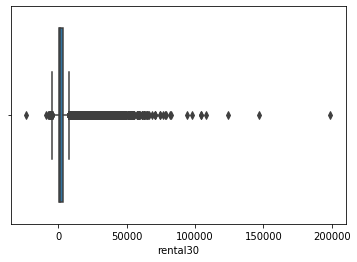

In [16]:
sns.boxplot(x=df_credit['rental30'])

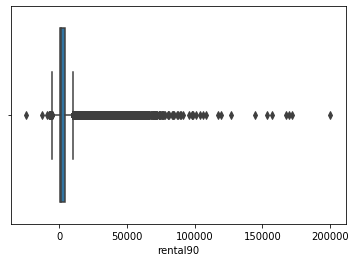

In [17]:
sns.boxplot(x=df_credit['rental90'])

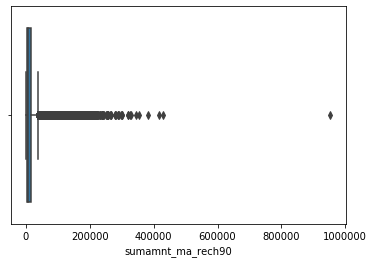

In [18]:
sns.boxplot(x=df_credit['sumamnt_ma_rech90'])

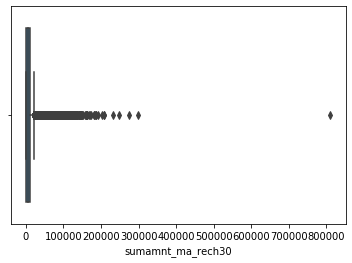

In [19]:
sns.boxplot(x=df_credit['sumamnt_ma_rech30'])

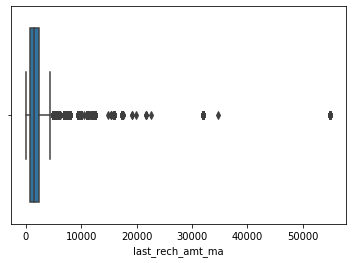

In [20]:
sns.boxplot(x=df_credit['last_rech_amt_ma'])

In [21]:
df_credit['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

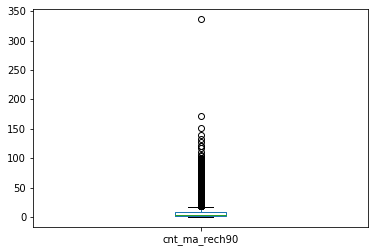

In [22]:
df_credit['cnt_ma_rech90'].plot.box()

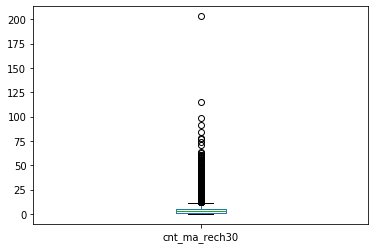

In [23]:
df_credit['cnt_ma_rech30'].plot.box()

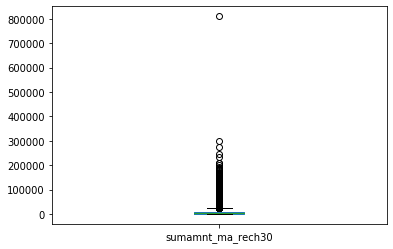

In [24]:
df_credit['sumamnt_ma_rech30'].plot.box()

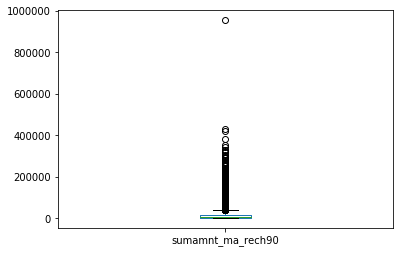

In [25]:
df_credit['sumamnt_ma_rech90'].plot.box()

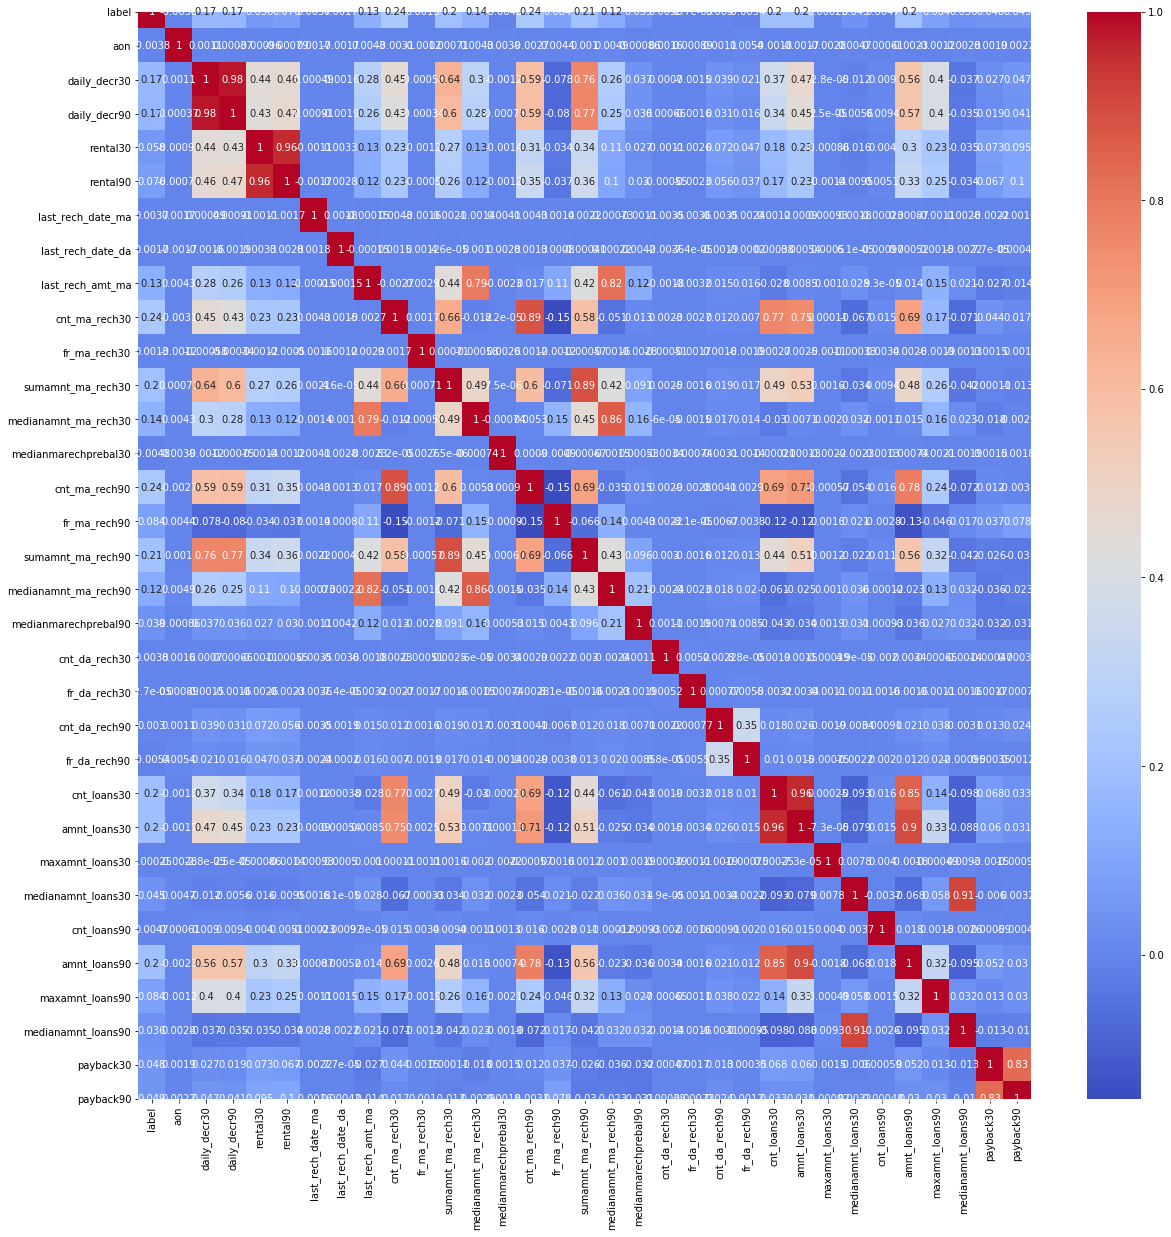

In [26]:
#lets see the corelation among data
plt.figure(figsize=(20,20))
sns.heatmap(df_credit.corr(),cmap='coolwarm',annot=True)

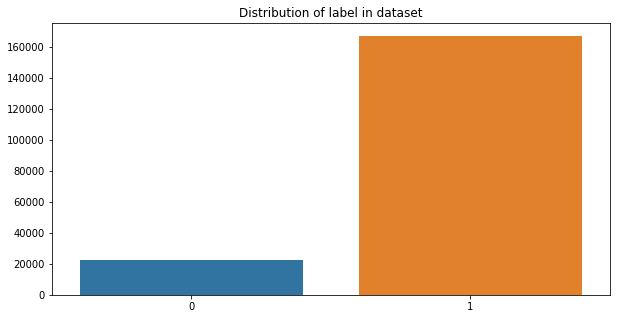

In [118]:
# now lets see the distribution of "label" in the dataset
plt.figure(figsize=(10,5))
plt.title('Distribution of label in dataset')
y = df_credit["label"].value_counts()
sns.barplot(y.index, y.values)

# so by looking this bar plot, there is more label is True as compare to False.
# so the dataset is imbalanced. Label ‘1’ has approximately 85% records, while, label ‘0’ has approximately 15% records.
# so we will theat the datas using over sampling and under sampling technique, but before that we will build different
# model and then will go for this technoique.

In [28]:
# label distribution of target 
print(df_credit.groupby('label').size())

label
0     26162
1    183431
dtype: int64


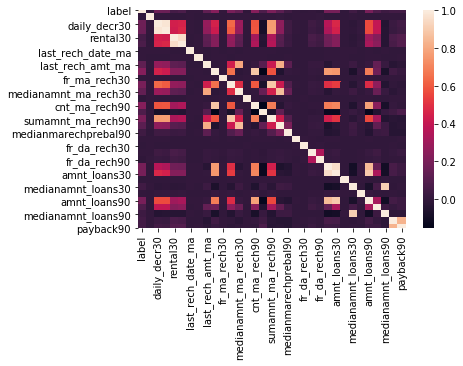

In [29]:
df_creditcor=df_credit.corr()
sns.heatmap(df_creditcor)

In [30]:
# Removing Erroneous data

In [31]:
df_credit = df_credit.loc[~((df_credit.aon > 13000))]
df_credit.shape

(207504, 34)

In [32]:
df_credit = df_credit.loc[~((df_credit.daily_decr30 > 200000))]
df_credit.shape

(207501, 34)

In [33]:
df_credit = df_credit.loc[~((df_credit.rental30 < 0))]
df_credit.shape

(201928, 34)

In [34]:
df_credit = df_credit.loc[~((df_credit.rental90 < 0))]
df_credit.shape

(201630, 34)

In [35]:
df_credit = df_credit.loc[~((df_credit.rental90 > 200000))]
df_credit.shape

(201629, 34)

In [36]:
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [37]:
df_credit['year']= df_credit['pdate'].str.split('-').str[0]
df_credit['month']= df_credit['pdate'].str.split('-').str[1]
df_credit['date']= df_credit['pdate'].str.split('-').str[2]

In [38]:
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,07,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,08,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,08,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,06,06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,2016,06,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,2016,06,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,2016,07,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,2016,07,25


In [39]:
del df_credit['pdate']

In [40]:
del df_credit['year']

In [41]:
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,07,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,08,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,08,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06,06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,06,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,06,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,07,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,07,25


In [42]:
df_credit['date'] = df_credit['date'].astype(int)

In [43]:
df_credit.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [44]:
df_credit = df_credit.loc[~((df_credit.sumamnt_ma_rech30 > 100000))]
df_credit.shape

(201510, 35)

In [45]:
df_credit = df_credit.loc[~((df_credit.sumamnt_ma_rech90 > 200000))]
df_credit.shape

(201486, 35)

In [46]:
df_credit = df_credit.loc[~((df_credit.daily_decr90 > 200000))]
df_credit.shape

(201484, 35)

In [47]:
df_credit = df_credit.loc[~((df_credit.rental30 > 200000))]
df_credit.shape

(201484, 35)

In [48]:
df_credit = df_credit.loc[~((df_credit.cnt_ma_rech90 > 200))]
df_credit.shape

(201484, 35)

In [49]:
df_credit = df_credit.loc[~((df_credit.cnt_da_rech90 > 200))]
df_credit.shape

(201484, 35)

In [50]:
df_credit = df_credit.loc[~((df_credit.last_rech_amt_ma > 200000))]
df_credit.shape

(201484, 35)

In [51]:
df_credit = df_credit.loc[~((df_credit.medianmarechprebal30 < 0))]
df_credit.shape

(199879, 35)

In [52]:
df_credit = df_credit.loc[~((df_credit.medianmarechprebal90 < 0))]
df_credit.shape

(199703, 35)

In [53]:
df_credit = df_credit.loc[~((df_credit.medianmarechprebal30 > 200000))]
df_credit.shape

(198710, 35)

In [54]:
df_credit = df_credit.loc[~((df_credit.cnt_loans90 > 1000))]
df_credit.shape

(197725, 35)

In [55]:
df_credit = df_credit.loc[~((df_credit.cnt_da_rech30 > 1000))]
df_credit.shape

(196728, 35)

In [56]:
df_credit = df_credit.loc[~((df_credit.fr_da_rech30 > 1000))]
df_credit.shape

(195750, 35)

In [57]:
df_credit = df_credit.loc[~((df_credit.maxamnt_loans30 > 200000))]
df_credit.shape

(195750, 35)

In [58]:
df_credit = pd.get_dummies(df_credit,prefix='month')

In [59]:
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month_06,month_07,month_08
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,20,0,1,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,10,0,0,1
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,19,0,0,1
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,6,1,0,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2.0,12,6,0.0,1.000000,1.000000,17,1,0,0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3.0,18,6,0.0,1.000000,1.000000,12,1,0,0
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,6.0,54,12,0.0,4.000000,3.833333,29,0,1,0
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,3.0,24,12,0.0,0.000000,10.500000,25,0,1,0


In [60]:
df_credit.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [61]:
df_credit['month_06'] = df_credit['month_06'].astype(int)
df_credit['month_07'] = df_credit['month_07'].astype(int)
df_credit['month_08'] = df_credit['month_08'].astype(int)

In [62]:
df_credit.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [63]:
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,195750.0,0.874432,0.331363,0.000000,1.00000,1.000000,1.0000,1.000000
aon,195750.0,651.230375,497.750108,-48.000000,242.00000,516.000000,956.0000,2440.000000
daily_decr30,195750.0,5441.581564,8946.187719,-93.012667,41.84025,1569.556667,7425.3500,149709.000000
daily_decr90,195750.0,6151.717023,10574.452493,-93.012667,42.00900,1603.290000,8030.6875,191854.050000
rental30,195750.0,2776.300457,4299.691816,0.000000,313.87750,1151.720000,3468.4350,147045.420000
rental90,195750.0,3590.969403,5773.822566,0.000000,359.96250,1424.230000,4330.6600,172084.420000
last_rech_date_ma,195750.0,3788.073602,54139.164501,-29.000000,1.00000,3.000000,7.0000,998650.377733
last_rech_date_da,195750.0,3765.239890,53749.565553,-29.000000,0.00000,0.000000,0.0000,999171.809410
last_rech_amt_ma,195750.0,1991.820480,2257.665764,0.000000,770.00000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,195750.0,3.998253,4.218613,0.000000,1.00000,3.000000,5.0000,78.000000


In [64]:
df_credit = df_credit.loc[~((df_credit.last_rech_date_ma > 13000))]
df_credit.shape

(194764, 37)

In [65]:
df_credit = df_credit.loc[~((df_credit.last_rech_date_da > 13000))]
df_credit.shape

(193778, 37)

In [66]:
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,193778.0,0.874299,0.331512,0.000000,1.000000,1.000000,1.0000,1.000000
aon,193778.0,651.220092,497.807431,-48.000000,242.000000,515.000000,956.0000,2440.000000
daily_decr30,193778.0,5442.568231,8946.614228,-93.012667,41.840000,1572.000000,7426.0000,149709.000000
daily_decr90,193778.0,6152.676505,10573.549188,-93.012667,42.005667,1605.615000,8033.8750,191854.050000
rental30,193778.0,2775.365672,4298.012341,0.000000,313.537500,1151.290000,3467.7175,147045.420000
rental90,193778.0,3590.222011,5769.842941,0.000000,359.830000,1424.230000,4331.2500,172084.420000
last_rech_date_ma,193778.0,5.931669,9.589680,-29.000000,1.000000,3.000000,7.0000,113.000000
last_rech_date_da,193778.0,0.954897,7.133910,-29.000000,0.000000,0.000000,0.0000,115.000000
last_rech_amt_ma,193778.0,1991.507591,2257.655036,0.000000,770.000000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,193778.0,3.996883,4.216167,0.000000,1.000000,3.000000,5.0000,78.000000


In [67]:
df_credit = df_credit.loc[~((df_credit.daily_decr30 > 200000))]
df_credit.shape

(193778, 37)

In [68]:
df_credit = df_credit.loc[~((df_credit.daily_decr90 > 200000))]
df_credit.shape

(193778, 37)

In [69]:
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,193778.0,0.874299,0.331512,0.000000,1.000000,1.000000,1.0000,1.000000
aon,193778.0,651.220092,497.807431,-48.000000,242.000000,515.000000,956.0000,2440.000000
daily_decr30,193778.0,5442.568231,8946.614228,-93.012667,41.840000,1572.000000,7426.0000,149709.000000
daily_decr90,193778.0,6152.676505,10573.549188,-93.012667,42.005667,1605.615000,8033.8750,191854.050000
rental30,193778.0,2775.365672,4298.012341,0.000000,313.537500,1151.290000,3467.7175,147045.420000
rental90,193778.0,3590.222011,5769.842941,0.000000,359.830000,1424.230000,4331.2500,172084.420000
last_rech_date_ma,193778.0,5.931669,9.589680,-29.000000,1.000000,3.000000,7.0000,113.000000
last_rech_date_da,193778.0,0.954897,7.133910,-29.000000,0.000000,0.000000,0.0000,115.000000
last_rech_amt_ma,193778.0,1991.507591,2257.655036,0.000000,770.000000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,193778.0,3.996883,4.216167,0.000000,1.000000,3.000000,5.0000,78.000000


In [70]:
df_credit = df_credit.loc[~((df_credit.aon < 0))]
df_credit.shape

(192348, 37)

In [71]:
df_credit = df_credit.loc[~((df_credit.daily_decr30 < 0))]
df_credit.shape

(190597, 37)

In [72]:
df_credit = df_credit.loc[~((df_credit.last_rech_date_ma < 0))]
df_credit.shape

(189409, 37)

In [73]:
df_credit = df_credit.loc[~((df_credit.last_rech_date_da < 0))]
df_credit.shape

(189399, 37)

In [74]:
df_credit.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month_06,month_07,month_08
count,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,...,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000,189399.000000
mean,0.881747,656.600853,5566.089658,6292.614271,2817.163376,3649.825496,6.136659,0.974646,2011.893732,4.066558,...,3.789429,24.277953,6.733119,0.045734,3.478458,4.438404,14.428751,0.373867,0.421977,0.204156
std,0.322908,495.690326,9011.767035,10654.240975,4323.829813,5809.754370,9.267712,7.203650,2261.003659,4.235659,...,4.075881,26.727791,2.142256,0.200210,8.857172,10.391178,8.420422,0.483830,0.493876,0.403085
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,247.000000,46.989833,47.223667,331.485000,380.130000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,1.000000,521.000000,1738.765333,1782.800000,1186.650000,1473.250000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,1.000000,1.863636,14.000000,0.000000,0.000000,0.000000
75%,1.000000,960.000000,7636.043333,8264.585000,3543.725000,4415.985000,7.000000,0.000000,2309.000000,6.000000,...,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667,21.000000,1.000000,1.000000,0.000000
max,1.000000,2440.000000,149709.000000,191854.050000,147045.420000,172084.420000,113.000000,115.000000,55000.000000,78.000000,...,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,1.000000,1.000000,1.000000


In [75]:
df_credit.skew()

label                   -2.364455
aon                      0.962267
daily_decr30             3.164595
daily_decr90             3.396850
rental30                 4.086997
rental90                 4.209685
last_rech_date_ma        3.599560
last_rech_date_da        9.481702
last_rech_amt_ma         3.793694
cnt_ma_rech30            2.607593
fr_ma_rech30            14.740161
sumamnt_ma_rech30        2.988439
medianamnt_ma_rech30     3.513688
medianmarechprebal30    40.283462
cnt_ma_rech90            2.868664
fr_ma_rech90             2.304850
sumamnt_ma_rech90        3.186580
medianamnt_ma_rech90     3.663192
medianmarechprebal90    45.652690
cnt_da_rech30           30.732486
fr_da_rech30            30.299012
cnt_da_rech90           27.081231
fr_da_rech90            27.928197
cnt_loans30              2.619408
amnt_loans30             2.820787
maxamnt_loans30         17.618813
medianamnt_loans30       4.582743
cnt_loans90              2.926740
amnt_loans90             3.034208
maxamnt_loans9

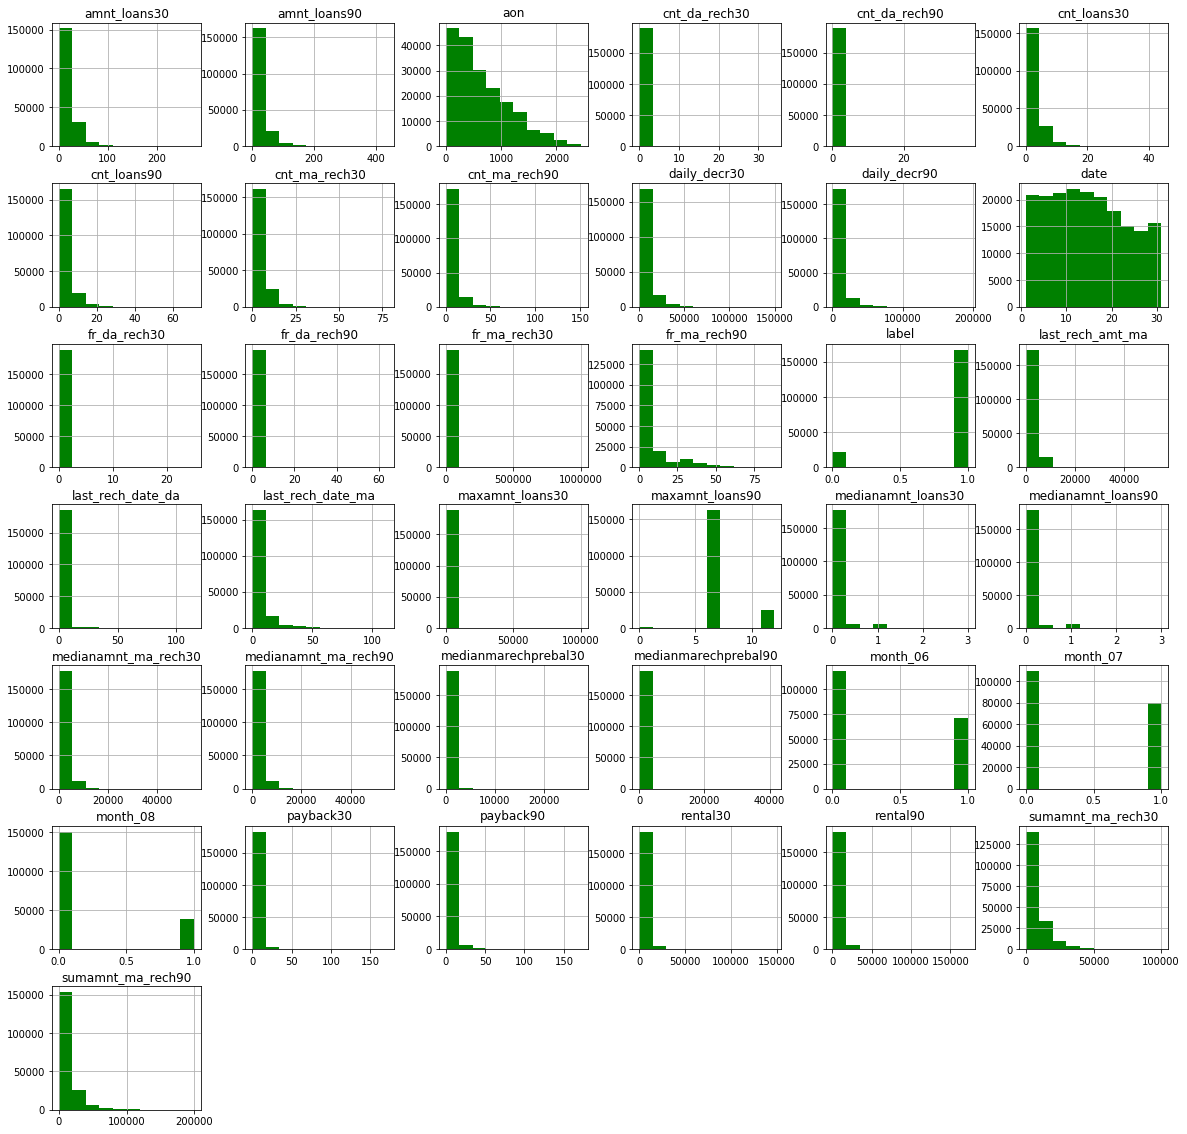

In [76]:
#Plotting the Histogram
df_credit.hist(figsize=(20,20),color='g')
plt.show()

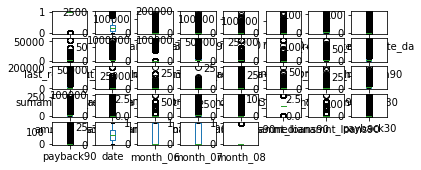

In [77]:
# Univariant Visualization - box and whisker plots
df_credit.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

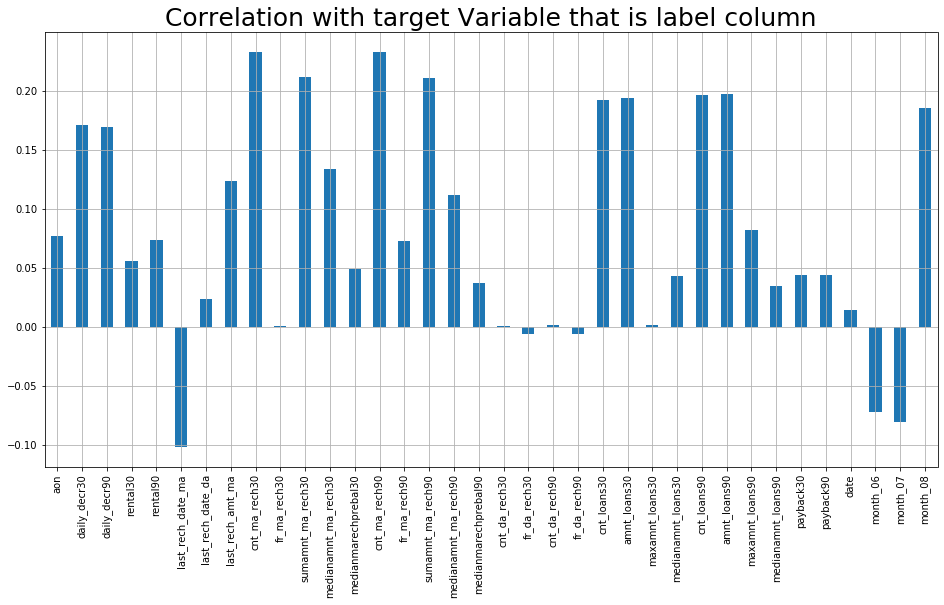

In [78]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df_credit.drop('label', axis=1).corrwith(df_credit['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

In [102]:
x=df_credit.drop(columns=["label"])

In [103]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month_06,month_07,month_08
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,20,0,1,0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,10,0,0,1
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,19,0,0,1
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,6,1,0,0
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2.0,12,6,0.0,1.000000,1.000000,17,1,0,0
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3.0,18,6,0.0,1.000000,1.000000,12,1,0,0
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,6.0,54,12,0.0,4.000000,3.833333,29,0,1,0
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,3.0,24,12,0.0,0.000000,10.500000,25,0,1,0


In [104]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [105]:
x

array([[-0.77589141, -0.27864083, -0.30292846, ..., -0.77272523,
         1.17038372, -0.50648607],
       [ 0.1117619 ,  0.72748526,  0.54740184, ..., -0.77272523,
        -0.85442063,  1.97438795],
       [-0.24531682, -0.46251758, -0.45940647, ..., -0.77272523,
        -0.85442063,  1.97438795],
       ...,
       [ 0.71899746,  0.69653804,  0.52671519, ..., -0.77272523,
         1.17038372, -0.50648607],
       [ 2.16950368,  0.76812427,  0.58960299, ..., -0.77272523,
         1.17038372, -0.50648607],
       [ 1.8648772 , -0.11948051, -0.16498584, ..., -0.77272523,
         1.17038372, -0.50648607]])

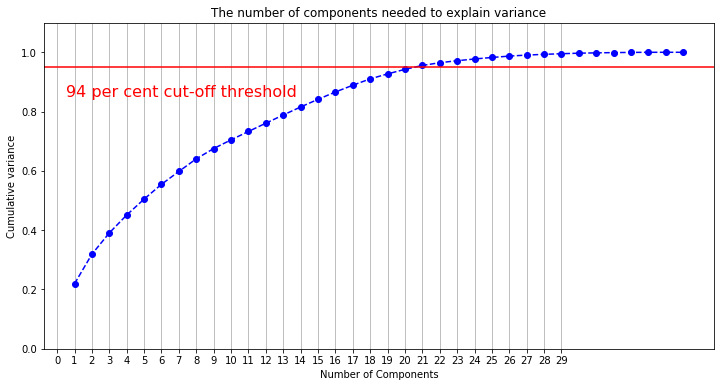

In [106]:
pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 37, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '94 per cent cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [107]:
pca = PCA(n_components=18)

In [108]:
pca_x = pca.fit_transform(x)

In [109]:
x = pca_x

In [110]:
x

array([[-1.36582213, -0.25227107,  0.56495424, ..., -0.62022426,
        -0.10640667,  0.46187495],
       [ 0.27502896,  3.80031016, -0.63041168, ..., -1.2358184 ,
         1.22932344, -1.22886932],
       [-1.82452013,  0.25238882, -0.23591787, ..., -0.13457395,
        -0.14373332,  0.25285688],
       ...,
       [ 2.61173099, -0.50981897,  0.31064774, ..., -1.36889608,
         0.76788891, -0.75073864],
       [ 1.02374747,  0.51019683,  2.57464976, ..., -0.20616867,
        -1.52104318, -1.67772191],
       [ 0.40382886,  3.9480026 , -0.54199878, ..., -0.56579811,
         1.30013197, -1.56709615]])

In [111]:
y=df_credit[["label"]]

In [112]:
y

,label
0,0
1,1
2,1
3,1
4,1
...,...
209588,1
209589,1
209590,1
209591,1


# Modelling

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [91]:
print(x_train.shape,x_test.shape)

(151519, 18) (37880, 18)


In [92]:
print(y_train.shape,y_test.shape)

(151519, 1) (37880, 1)


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [94]:
KNN=KNeighborsClassifier(n_neighbors=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [95]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [96]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy score =  0.8892291446673707




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was

Cross_val_Score =  0.8895453824188507


roc_auc_score =  0.6785894907712662


classification_report
               precision    recall  f1-score   support

           0       0.54      0.40      0.46      4483
           1       0.92      0.95      0.94     33397

    accuracy                           0.89     37880
   macro avg       0.73      0.68      0.70     37880
weighted avg       0.88      0.89      0.88     37880



[[ 1805  2678]
 [ 1518 31879]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.8904699049630412




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Cross_val_Score =  0.8900205510455008


roc_auc_score =  0.5832149007174124


classification_report
               precision    recall  f1-score   support

           0       0.63      0.18      0.28      4483
           1       0.90      0.99      0.94     33397

    accuracy                           0.89     37880
   macro avg       0.76      0.58      0.61     37880
weighted avg       0.87      0.89      0.86     37880



[[  810  3673]
 [  476 32921]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** DecisionTreeClassifier ********************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Cross_val_Score =  0.8683942936382879


roc_auc_score =  0.6211328198964203


classification_report
               precision    recall  f1-score   support

           0       0.41      0.30      0.35      4483
           1       0.91      0.94      0.93     33397

    accuracy                           0.87     37880
   macro avg       0.66      0.62      0.64     37880
weighted avg       0.85      0.87      0.86     37880



[[ 1343  3140]
 [ 1914 31483]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** RandomForestClassifier ********************************


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oo

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

Cross_val_Score =  0.8884682854543943


roc_auc_score =  0.6724094933172399


classification_report
               precision    recall  f1-score   support

           0       0.52      0.39      0.45      4483
           1       0.92      0.95      0.94     33397

    accuracy                           0.89     37880
   macro avg       0.72      0.67      0.69     37880
weighted avg       0.87      0.89      0.88     37880



[[ 1761  2722]
 [ 1603 31794]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





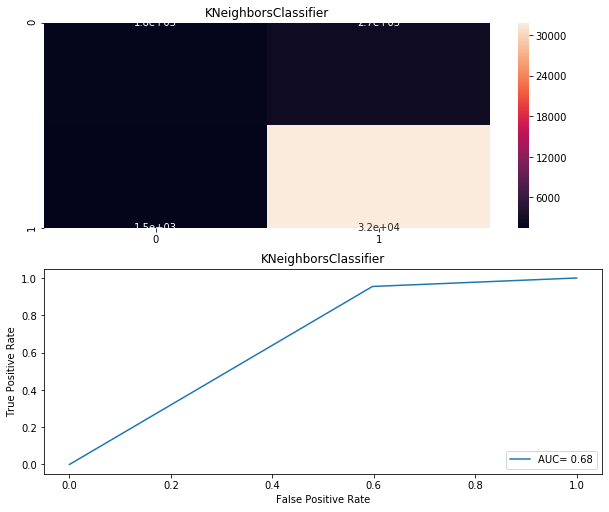

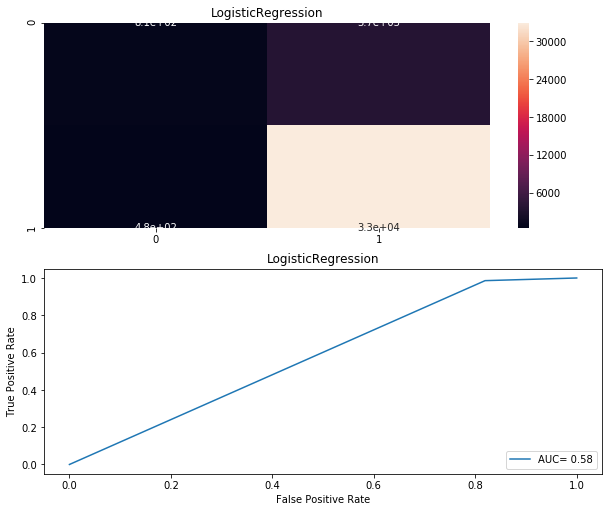

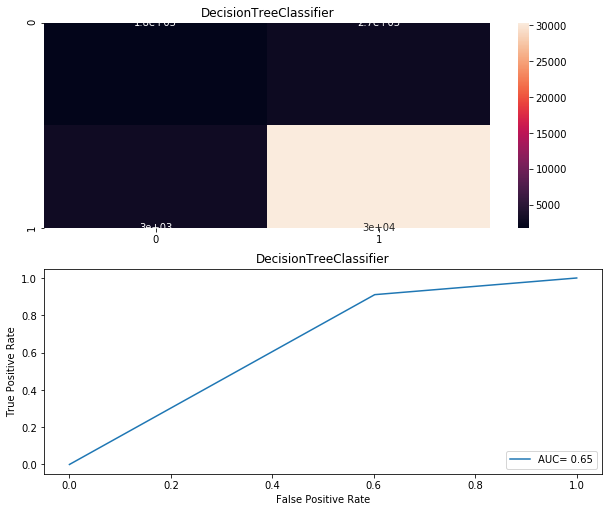

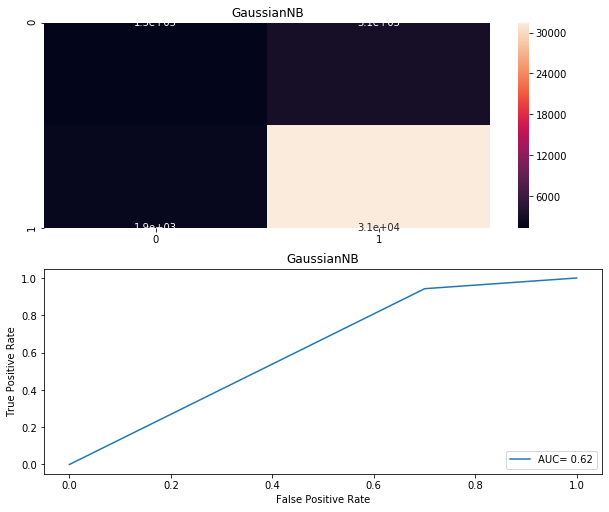

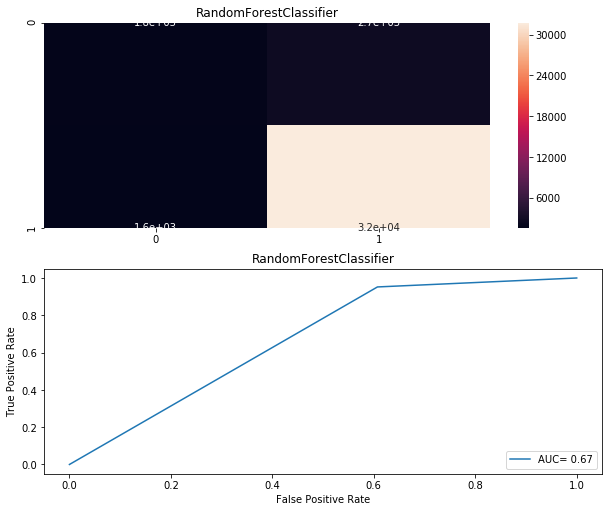

In [97]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label = 'AUC= %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [98]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,88.922914,88.954538,67.858949
1,LogisticRegression,89.046990,89.002055,58.321490
2,DecisionTreeClassifier,85.002640,85.213232,65.442573
3,GaussianNB,86.657867,86.839429,62.113282
4,RandomForestClassifier,88.582365,88.846829,67.240949


# Model Selection

# Save the Model

In [115]:
from sklearn.externals import joblib

In [116]:
joblib.dump(KNN,'MicroCredit.csv')

['MicroCredit.csv']